# Predicting whether or not a mushroom is edible with machine learning

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a model capable of predicting whether a mushroom is edible or not based on their morphological and ecological attributes.

The framework:
1. Problem defintion
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

Given morphological and ecological parameters about a mushroom, can we predict wether or not they are edible?.

## 2. Data

The data is derived from the UCI machine learning repository.
https://archive.ics.uci.edu/ml/datasets/mushroom

## 3. Evaluation

If we can reach 95% at predicting whether or not a mushroom is edible during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information of each of the features in the data. You can do this via doing your own research (such as opening the link above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**
1. capshape: bell,conical,convex,flat, knobbed,sunken
              The shape of a mushroom's cap (the top part of a mushroom).
2. capsurface: fibrous,grooves,scaly,smooth
               The texture of a mushroom's cap.
3. capcolor: brown,buff,cinnamon,gray,green, pink,purple,red,white,yellow
              The color of a mushroom's cap.
4. bruises: bruises,no
          Mushroom bruise is a phenomenon of colour change (that looks like a bruise) on a mushroom's part when          it gets physically damaged.
5. odor: almond,anise,creosote,fishy,foul, musty,none,pungent,spicy
         The odor of a mushroom.
6. gillattachment: attached,descending,free,notched
               The type of the attachment of a mushroom's gill (a papery hymenophore rib under the cap of some                mushroom species, most often but not always agarics. The gills are used by the mushrooms as a                      means of spore dispersal, and are important for species identification).
7. gillspacing: close,crowded,distant
                 The spacing of a mushroom's gill.
8. gillsize: broad,narrow
             The size of a mushroom's gill.
9. gillcolor: black,brown,buff,chocolate,gray, green,orange,pink,purple,red, white,yellow
              The color of a mushroom's gill.
10. stalkshape: enlarging,tapering
               The shape of a mushroom's stalk (a stem supporting the cap of a mushroom).
11. stalkroot: bulbous,club,cup,equal, rhizomorphs,rooted,missing=?
               The type of a mushroom's stalk root
12. stalksurfacearing: fibrous,scaly,silky,smooth
                       The texture of a mushroom's stalk above its ring.
13. stalksurfacebring: fibrous=scaly,silky,smooth
                       The texture of a mashroom's stalk below its ring.
14. stalkcoloraring: brown,buff,cinnamon,gray,orange, pink,red,white,yellow
                     The color of a mushroom's stalk above its ring.
15. stalkcolorbring: brown,buff,cinnamon,gray,orange, pink,red,white,yellow
                     The color of a mushroom's stalk below its ring.
16. veiltype: partial,universal
              The type of a mushroom's veil (the thin membrane that covers the cap and stalk of an immature                     mushroom).
17. veilcolor: brown,orange,white,yellow
               The color of a mushroom's veil
18. ringnumber: none,one,two
               The total number of a mushroom's ring (also called an annulus, the ring-like or collar-like                        structure sometimes found on the stipe of some species of mushrooms. The annulus represents the                    remaining part of the partial veil, after it has ruptured to expose the gills or other spore-                      producing surface).
19. ringtype: cobwebby,evanescent,flaring,large, none,pendant,sheathing,zone
              The type of a mushroom's ring.
20. sporeprintcolor: black,brown,buff,chocolate,green, orange,purple,white,yellow
                    The color of a mushroom's spore print.
21. population: abundant,clustered,numerous, scattered,several,solitary
               The population of type of a mushroom.
22. habitat: grasses,leaves,meadows,paths, urban,waste,woods
             The habitat of a mushroom.
23. target : 1 = edible, 0 = poisonous
             The label to classify wether or not a mushroom is edible.

### Preparing the tools

In [102]:
# Importing all the tools we need for the project

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from scikit learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Data preprocessor and transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load data 

In [203]:
mushroom_data = pd.read_csv("mushroom.csv")
np.random.seed(0)
mushroom_data = mushroom_data.sample(frac=1)
mushroom_data.shape

(8416, 23)

### Exploratory data analysis (EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.
1. What question(s) are you trying to solve?
2. What kind of data do we have and how we treat different types?
3. What's missing from the data and how to deal with them?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [39]:
mushroom_data.head()

target capshape capsurface capcolor  bruises   odor gillattachment  \
6637  POISONOUS   CONVEX      SCALY    BROWN       NO  SPICY           FREE   
2407     EDIBLE   CONVEX    FIBROUS      RED  BRUISES   NONE           FREE   
4858  POISONOUS     FLAT    FIBROUS     GRAY       NO   FOUL           FREE   
2171     EDIBLE     FLAT    FIBROUS    BROWN       NO   NONE           FREE   
2563     EDIBLE   CONVEX    FIBROUS    BROWN  BRUISES   NONE           FREE   

     gillspacing gillsize  gillcolor stalkshape stalkroot stalksurfacea  \
6637       CLOSE   NARROW       BUFF   TAPERING         ?        SMOOTH   
2407       CLOSE    BROAD     PURPLE   TAPERING   BULBOUS        SMOOTH   
4858       CLOSE    BROAD  CHOCOLATE  ENLARGING   BULBOUS         SILKY   
2171     CROWDED    BROAD      BROWN   TAPERING     EQUAL       FIBROUS   
2563       CLOSE    BROAD     PURPLE   TAPERING   BULBOUS        SMOOTH   

     stalksurfaceb stalkcoloraring stalkcolorbring veiltype veilcolor  \
6637        SMOOTH           WHITE            PINK  PARTIAL     WHITE   
2407        SMOOTH            PINK           WHITE  PARTIAL     WHITE   
4858         SILKY            BUFF            PINK  PARTIAL     WHITE   
2171        SMOOTH           WHITE           WHITE  PARTIAL     WHITE   
2563        SMOOTH            GRAY           WHITE  PARTIAL     WHITE   

     ringnumber    ringtype sporeprintcolor population  habitat  
6637        ONE  EVANESCENT           WHITE    SEVERAL    WOODS  
2407        ONE     PENDANT           BROWN    SEVERAL    WOODS  
4858        ONE       LARGE       CHOCOLATE   SOLITARY  GRASSES  
2171        ONE  EVANESCENT           BROWN   ABUNDANT  GRASSES  
2563        ONE     PENDANT           BROWN    SEVERAL    WOODS

In [40]:
mushroom_data.tail()

target capshape capsurface capcolor  bruises  odor gillattachment  \
4373  POISONOUS   CONVEX    FIBROUS   YELLOW       NO  FOUL           FREE   
7891     EDIBLE     BELL     SMOOTH    WHITE       NO  NONE           FREE   
4859  POISONOUS     FLAT    FIBROUS     GRAY       NO  FOUL           FREE   
3264     EDIBLE     FLAT    FIBROUS      RED  BRUISES  NONE           FREE   
2732     EDIBLE   CONVEX      SCALY     GRAY  BRUISES  NONE           FREE   

     gillspacing gillsize  gillcolor stalkshape stalkroot stalksurfacea  \
4373       CLOSE    BROAD  CHOCOLATE  ENLARGING   BULBOUS         SILKY   
7891     CROWDED    BROAD      WHITE  ENLARGING         ?        SMOOTH   
4859       CLOSE    BROAD  CHOCOLATE  ENLARGING   BULBOUS         SILKY   
3264       CLOSE    BROAD     PURPLE   TAPERING   BULBOUS        SMOOTH   
2732       CLOSE    BROAD      BROWN   TAPERING   BULBOUS        SMOOTH   

     stalksurfaceb stalkcoloraring stalkcolorbring veiltype veilcolor  \
4373         SILKY            BUFF            PINK  PARTIAL     WHITE   
7891         SILKY           WHITE           WHITE  PARTIAL     WHITE   
4859         SILKY            BUFF            PINK  PARTIAL     WHITE   
3264        SMOOTH           WHITE            GRAY  PARTIAL     WHITE   
2732        SMOOTH            PINK            PINK  PARTIAL     WHITE   

     ringnumber ringtype sporeprintcolor population  habitat  
4373        ONE    LARGE       CHOCOLATE   SOLITARY    PATHS  
7891        TWO  PENDANT           WHITE   NUMEROUS  GRASSES  
4859        ONE    LARGE       CHOCOLATE   SOLITARY    PATHS  
3264        ONE  PENDANT           BLACK   SOLITARY    WOODS  
2732        ONE  PENDANT           BLACK   SOLITARY    WOODS

In [208]:
# Changing the items in the "target" column to binary items (1 and 0)
index_number = 0

for i in mushroom_data["target"]:
    if i == "EDIBLE":
        mushroom_data.target[mushroom_data.target.index[index_number]] = 1
    elif i == "POISONOUS":
        mushroom_data.target[mushroom_data.target.index[index_number]] = 0
    index_number += 1

In [257]:
mushroom_data["target"].dtype

dtype('O')

In [258]:
# Converting the binary target data type from object to int64
mushroom_data["target"] = mushroom_data["target"].astype(int)

In [259]:
mushroom_data["target"].dtype

dtype('int64')

In [260]:
# Viewing the data again
mushroom_data.head(10)

target capshape capsurface capcolor  bruises   odor gillattachment  \
6637       0   CONVEX      SCALY    BROWN       NO  SPICY           FREE   
2407       1   CONVEX    FIBROUS      RED  BRUISES   NONE           FREE   
4858       0     FLAT    FIBROUS     GRAY       NO   FOUL           FREE   
2171       1     FLAT    FIBROUS    BROWN       NO   NONE           FREE   
2563       1   CONVEX    FIBROUS    BROWN  BRUISES   NONE           FREE   
6350       0   CONVEX     SMOOTH    BROWN       NO  SPICY           FREE   
4477       0   CONVEX      SCALY     GRAY       NO   FOUL           FREE   
6814       0     FLAT     SMOOTH      RED       NO  SPICY           FREE   
2103       1     FLAT    FIBROUS     GRAY       NO   NONE           FREE   
4750       0     FLAT    FIBROUS     GRAY       NO   FOUL           FREE   

     gillspacing gillsize  gillcolor stalkshape stalkroot stalksurfacea  \
6637       CLOSE   NARROW       BUFF   TAPERING         ?        SMOOTH   
2407       CLOSE    BROAD     PURPLE   TAPERING   BULBOUS        SMOOTH   
4858       CLOSE    BROAD  CHOCOLATE  ENLARGING   BULBOUS         SILKY   
2171     CROWDED    BROAD      BROWN   TAPERING     EQUAL       FIBROUS   
2563       CLOSE    BROAD     PURPLE   TAPERING   BULBOUS        SMOOTH   
6350       CLOSE   NARROW       BUFF   TAPERING         ?        SMOOTH   
4477       CLOSE    BROAD       PINK  ENLARGING   BULBOUS         SILKY   
6814       CLOSE   NARROW       BUFF   TAPERING         ?         SILKY   
2103     CROWDED    BROAD      BROWN   TAPERING     EQUAL        SMOOTH   
4750       CLOSE    BROAD       GRAY  ENLARGING   BULBOUS         SILKY   

     stalksurfaceb stalkcoloraring stalkcolorbring veiltype veilcolor  \
6637        SMOOTH           WHITE            PINK  PARTIAL     WHITE   
2407        SMOOTH            PINK           WHITE  PARTIAL     WHITE   
4858         SILKY            BUFF            PINK  PARTIAL     WHITE   
2171        SMOOTH           WHITE           WHITE  PARTIAL     WHITE   
2563        SMOOTH            GRAY           WHITE  PARTIAL     WHITE   
6350        SMOOTH            PINK           WHITE  PARTIAL     WHITE   
4477         SILKY            BUFF            BUFF  PARTIAL     WHITE   
6814         SILKY           WHITE           WHITE  PARTIAL     WHITE   
2103       FIBROUS           WHITE           WHITE  PARTIAL     WHITE   
4750         SILKY            BUFF            PINK  PARTIAL     WHITE   

     ringnumber    ringtype sporeprintcolor population  habitat  
6637        ONE  EVANESCENT           WHITE    SEVERAL    WOODS  
2407        ONE     PENDANT           BROWN    SEVERAL    WOODS  
4858        ONE       LARGE       CHOCOLATE   SOLITARY  GRASSES  
2171        ONE  EVANESCENT           BROWN   ABUNDANT  GRASSES  
2563        ONE     PENDANT           BROWN    SEVERAL    WOODS  
6350        ONE  EVANESCENT           WHITE    SEVERAL   LEAVES  
4477        ONE       LARGE       CHOCOLATE    SEVERAL  GRASSES  
6814        ONE  EVANESCENT           WHITE    SEVERAL    WOODS  
2103        ONE  EVANESCENT           BROWN   ABUNDANT  GRASSES  
4750        ONE       LARGE       CHOCOLATE   SOLITARY  GRASSES

In [264]:
# Let's find out how many of each class are in the data
mushroom_data["target"].value_counts()

1    4488
0    3928
Name: target, dtype: int64

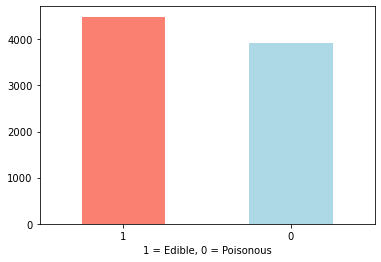

In [265]:
mushroom_data["target"].value_counts().plot.bar(color=["salmon", "lightblue"])
plt.xlabel("1 = Edible, 0 = Poisonous")
plt.xticks(rotation=0);

In [270]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8416 entries, 6637 to 2732
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   target           8416 non-null   int64 
 1   capshape         8416 non-null   object
 2   capsurface       8416 non-null   object
 3   capcolor         8416 non-null   object
 4   bruises          8416 non-null   object
 5   odor             8416 non-null   object
 6   gillattachment   8416 non-null   object
 7   gillspacing      8416 non-null   object
 8   gillsize         8416 non-null   object
 9   gillcolor        8416 non-null   object
 10  stalkshape       8416 non-null   object
 11  stalkroot        8416 non-null   object
 12  stalksurfacea    8416 non-null   object
 13  stalksurfaceb    8416 non-null   object
 14  stalkcoloraring  8416 non-null   object
 15  stalkcolorbring  8416 non-null   object
 16  veiltype         8416 non-null   object
 17  veilcolor        8416 non-null

In [271]:
# Are there any missing values?
mushroom_data.isna().sum()

target             0
capshape           0
capsurface         0
capcolor           0
bruises            0
odor               0
gillattachment     0
gillspacing        0
gillsize           0
gillcolor          0
stalkshape         0
stalkroot          0
stalksurfacea      0
stalksurfaceb      0
stalkcoloraring    0
stalkcolorbring    0
veiltype           0
veilcolor          0
ringnumber         0
ringtype           0
sporeprintcolor    0
population         0
habitat            0
dtype: int64

In [272]:
mushroom_data.describe()

target
count  8416.000000
mean      0.533270
std       0.498922
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000

### Poisonous mushrooms frequency according to bruises

In [273]:
mushroom_data["bruises"].value_counts()

NO         5040
BRUISES    3376
Name: bruises, dtype: int64

In [274]:
# Compare target column with bruises column
pd.crosstab(mushroom_data["target"], mushroom_data["bruises"])

bruises  BRUISES    NO
target                
0            624  3304
1           2752  1736

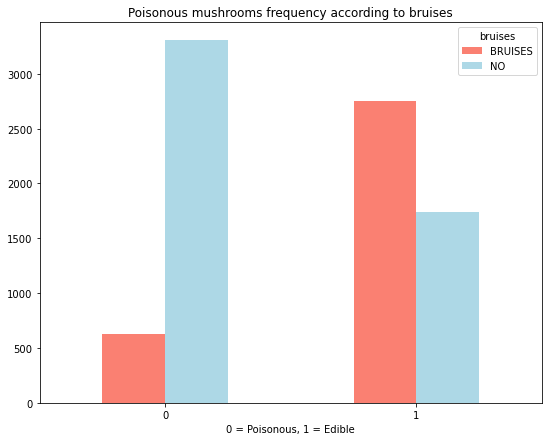

In [275]:
pd.crosstab(mushroom_data["target"], mushroom_data["bruises"]).plot.bar(figsize=(9, 7),
                                                                        color=["salmon", "lightblue"])
plt.title("Poisonous mushrooms frequency according to bruises")
plt.xticks(rotation=0)
plt.xlabel("0 = Poisonous, 1 = Edible");

As you can see, based on our relation analysis of the target column and bruises column, it turns out that mushrooms with bruises (when physically damaged) are more likely to be edible than mushrooms with no bruises. In contrast, based on the data relation discovery, mushrooms without bruises are more likely to be poisonous than mushrooms with bruises.

###  3. Poisonous frequency per habitat type



22. habitat: grasses,leaves,meadows,paths, urban,waste,woods
             The habitat of a mushroom.

In [276]:
pd.crosstab(mushroom_data["target"], mushroom_data["habitat"])

habitat  GRASSES  LEAVES  MEADOWS  PATHS  URBAN  WASTE  WOODS
target                                                       
0            740     592       36   1008    272      0   1280
1           1664     264      256    136     96    192   1880

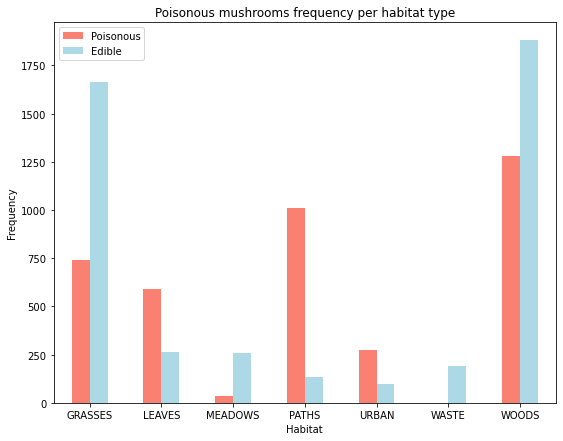

In [277]:
pd.crosstab(mushroom_data["target"], mushroom_data["habitat"]).T.plot.bar(figsize=(9,7),
                                                                        color=["salmon", "lightblue"])
plt.title("Poisonous mushrooms frequency per habitat type")
plt.xlabel("Habitat")
plt.ylabel("Frequency")
plt.legend(["Poisonous", "Edible"])
plt.xticks(rotation=0);

## 5. Modelling 

In [278]:
mushroom_data.head()

target capshape capsurface capcolor  bruises   odor gillattachment  \
6637       0   CONVEX      SCALY    BROWN       NO  SPICY           FREE   
2407       1   CONVEX    FIBROUS      RED  BRUISES   NONE           FREE   
4858       0     FLAT    FIBROUS     GRAY       NO   FOUL           FREE   
2171       1     FLAT    FIBROUS    BROWN       NO   NONE           FREE   
2563       1   CONVEX    FIBROUS    BROWN  BRUISES   NONE           FREE   

     gillspacing gillsize  gillcolor stalkshape stalkroot stalksurfacea  \
6637       CLOSE   NARROW       BUFF   TAPERING         ?        SMOOTH   
2407       CLOSE    BROAD     PURPLE   TAPERING   BULBOUS        SMOOTH   
4858       CLOSE    BROAD  CHOCOLATE  ENLARGING   BULBOUS         SILKY   
2171     CROWDED    BROAD      BROWN   TAPERING     EQUAL       FIBROUS   
2563       CLOSE    BROAD     PURPLE   TAPERING   BULBOUS        SMOOTH   

     stalksurfaceb stalkcoloraring stalkcolorbring veiltype veilcolor  \
6637        SMOOTH           WHITE            PINK  PARTIAL     WHITE   
2407        SMOOTH            PINK           WHITE  PARTIAL     WHITE   
4858         SILKY            BUFF            PINK  PARTIAL     WHITE   
2171        SMOOTH           WHITE           WHITE  PARTIAL     WHITE   
2563        SMOOTH            GRAY           WHITE  PARTIAL     WHITE   

     ringnumber    ringtype sporeprintcolor population  habitat  
6637        ONE  EVANESCENT           WHITE    SEVERAL    WOODS  
2407        ONE     PENDANT           BROWN    SEVERAL    WOODS  
4858        ONE       LARGE       CHOCOLATE   SOLITARY  GRASSES  
2171        ONE  EVANESCENT           BROWN   ABUNDANT  GRASSES  
2563        ONE     PENDANT           BROWN    SEVERAL    WOODS

In [279]:
# Separating the features and the labels of the data
x = mushroom_data.drop("target", axis=1)
y = mushroom_data["target"]

In [280]:
x

capshape capsurface capcolor  bruises   odor gillattachment gillspacing  \
6637   CONVEX      SCALY    BROWN       NO  SPICY           FREE       CLOSE   
2407   CONVEX    FIBROUS      RED  BRUISES   NONE           FREE       CLOSE   
4858     FLAT    FIBROUS     GRAY       NO   FOUL           FREE       CLOSE   
2171     FLAT    FIBROUS    BROWN       NO   NONE           FREE     CROWDED   
2563   CONVEX    FIBROUS    BROWN  BRUISES   NONE           FREE       CLOSE   
...       ...        ...      ...      ...    ...            ...         ...   
4373   CONVEX    FIBROUS   YELLOW       NO   FOUL           FREE       CLOSE   
7891     BELL     SMOOTH    WHITE       NO   NONE           FREE     CROWDED   
4859     FLAT    FIBROUS     GRAY       NO   FOUL           FREE       CLOSE   
3264     FLAT    FIBROUS      RED  BRUISES   NONE           FREE       CLOSE   
2732   CONVEX      SCALY     GRAY  BRUISES   NONE           FREE       CLOSE   

     gillsize  gillcolor stalkshape stalkroot stalksurfacea stalksurfaceb  \
6637   NARROW       BUFF   TAPERING         ?        SMOOTH        SMOOTH   
2407    BROAD     PURPLE   TAPERING   BULBOUS        SMOOTH        SMOOTH   
4858    BROAD  CHOCOLATE  ENLARGING   BULBOUS         SILKY         SILKY   
2171    BROAD      BROWN   TAPERING     EQUAL       FIBROUS        SMOOTH   
2563    BROAD     PURPLE   TAPERING   BULBOUS        SMOOTH        SMOOTH   
...       ...        ...        ...       ...           ...           ...   
4373    BROAD  CHOCOLATE  ENLARGING   BULBOUS         SILKY         SILKY   
7891    BROAD      WHITE  ENLARGING         ?        SMOOTH         SILKY   
4859    BROAD  CHOCOLATE  ENLARGING   BULBOUS         SILKY         SILKY   
3264    BROAD     PURPLE   TAPERING   BULBOUS        SMOOTH        SMOOTH   
2732    BROAD      BROWN   TAPERING   BULBOUS        SMOOTH        SMOOTH   

     stalkcoloraring stalkcolorbring veiltype veilcolor ringnumber  \
6637           WHITE            PINK  PARTIAL     WHITE        ONE   
2407            PINK           WHITE  PARTIAL     WHITE        ONE   
4858            BUFF            PINK  PARTIAL     WHITE        ONE   
2171           WHITE           WHITE  PARTIAL     WHITE        ONE   
2563            GRAY           WHITE  PARTIAL     WHITE        ONE   
...              ...             ...      ...       ...        ...   
4373            BUFF            PINK  PARTIAL     WHITE        ONE   
7891           WHITE           WHITE  PARTIAL     WHITE        TWO   
4859            BUFF            PINK  PARTIAL     WHITE        ONE   
3264           WHITE            GRAY  PARTIAL     WHITE        ONE   
2732            PINK            PINK  PARTIAL     WHITE        ONE   

        ringtype sporeprintcolor population  habitat  
6637  EVANESCENT           WHITE    SEVERAL    WOODS  
2407     PENDANT           BROWN    SEVERAL    WOODS  
4858       LARGE       CHOCOLATE   SOLITARY  GRASSES  
2171  EVANESCENT           BROWN   ABUNDANT  GRASSES  
2563     PENDANT           BROWN    SEVERAL    WOODS  
...          ...             ...        ...      ...  
4373       LARGE       CHOCOLATE   SOLITARY    PATHS  
7891     PENDANT           WHITE   NUMEROUS  GRASSES  
4859       LARGE       CHOCOLATE   SOLITARY    PATHS  
3264     PENDANT           BLACK   SOLITARY    WOODS  
2732     PENDANT           BLACK   SOLITARY    WOODS  

[8416 rows x 22 columns]

In [281]:
y

6637    0
2407    1
4858    0
2171    1
2563    1
       ..
4373    0
7891    1
4859    0
3264    1
2732    1
Name: target, Length: 8416, dtype: int64

In [282]:
# Converting the non numerical data into numerical data
transformed_x = pd.get_dummies(x)
transformed_x

capshape_BELL  capshape_CONICAL  capshape_CONVEX  capshape_FLAT  \
6637              0                 0                1              0   
2407              0                 0                1              0   
4858              0                 0                0              1   
2171              0                 0                0              1   
2563              0                 0                1              0   
...             ...               ...              ...            ...   
4373              0                 0                1              0   
7891              1                 0                0              0   
4859              0                 0                0              1   
3264              0                 0                0              1   
2732              0                 0                1              0   

      capshape_KNOBBED  capshape_SUNKEN  capsurface_FIBROUS  \
6637                 0                0                   0   
2407                 0                0                   1   
4858                 0                0                   1   
2171                 0                0                   1   
2563                 0                0                   1   
...                ...              ...                 ...   
4373                 0                0                   1   
7891                 0                0                   0   
4859                 0                0                   1   
3264                 0                0                   1   
2732                 0                0                   0   

      capsurface_GROOVES  capsurface_SCALY  capsurface_SMOOTH  capcolor_BROWN  \
6637                   0                 1                  0               1   
2407                   0                 0                  0               0   
4858                   0                 0                  0               0   
2171                   0                 0                  0               1   
2563                   0                 0                  0               1   
...                  ...               ...                ...             ...   
4373                   0                 0                  0               0   
7891                   0                 0                  1               0   
4859                   0                 0                  0               0   
3264                   0                 0                  0               0   
2732                   0                 1                  0               0   

      capcolor_BUFF  capcolor_CINNAMON  capcolor_GRAY  capcolor_GREEN  \
6637              0                  0              0               0   
2407              0                  0              0               0   
4858              0                  0              1               0   
2171              0                  0              0               0   
2563              0                  0              0               0   
...             ...                ...            ...             ...   
4373              0                  0              0               0   
7891              0                  0              0               0   
4859              0                  0              1               0   
3264              0                  0              0               0   
2732              0                  0              1               0   

      capcolor_PINK  capcolor_PURPLE  capcolor_RED  capcolor_WHITE  \
6637              0                0             0               0   
2407              0                0             1               0   
4858              0                0             0               0   
2171              0                0             0               0   
2563              0                0             0               0   
...             ...              ...           ...             ...   
4373              0             

In [283]:
# Split the data into train and test datasets
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

In [284]:
x_train

capshape_BELL  capshape_CONICAL  capshape_CONVEX  capshape_FLAT  \
6470              0                 0                1              0   
7585              0                 0                0              0   
2596              0                 0                1              0   
5895              0                 0                1              0   
2462              0                 0                1              0   
...             ...               ...              ...            ...   
2255              0                 0                1              0   
7853              0                 0                0              1   
2473              0                 0                1              0   
6808              0                 0                0              1   
7376              0                 0                0              0   

      capshape_KNOBBED  capshape_SUNKEN  capsurface_FIBROUS  \
6470                 0                0                   0   
7585                 1                0                   0   
2596                 0                0                   1   
5895                 0                0                   0   
2462                 0                0                   1   
...                ...              ...                 ...   
2255                 0                0                   1   
7853                 0                0                   0   
2473                 0                0                   1   
6808                 0                0                   0   
7376                 1                0                   0   

      capsurface_GROOVES  capsurface_SCALY  capsurface_SMOOTH  capcolor_BROWN  \
6470                   0                 1                  0               0   
7585                   0                 1                  0               0   
2596                   0                 0                  0               1   
5895                   0                 0                  1               0   
2462                   0                 0                  0               0   
...                  ...               ...                ...             ...   
2255                   0                 0                  0               0   
7853                   0                 1                  0               1   
2473                   0                 0                  0               1   
6808                   0                 0                  1               0   
7376                   0                 0                  1               0   

      capcolor_BUFF  capcolor_CINNAMON  capcolor_GRAY  capcolor_GREEN  \
6470              0                  0              0               0   
7585              0                  0              0               0   
2596              0                  0              0               0   
5895              0                  0              0               0   
2462              0                  0              0               0   
...             ...                ...            ...             ...   
2255              0                  0              1               0   
7853              0                  0              0               0   
2473              0                  0              0               0   
6808              0                  0              0               0   
7376              0                  0              0               0   

      capcolor_PINK  capcolor_PURPLE  capcolor_RED  capcolor_WHITE  \
6470              0                0             1               0   
7585              0                0             1               0   
2596              0                0             0               0   
5895              0                0             1               0   
2462              0                0             1               0   
...             ...              ...           ...             ...   
2255              0             

In [285]:
y_train

6470    0
7585    0
2596    1
5895    1
2462    1
       ..
2255    1
7853    0
2473    1
6808    0
7376    0
Name: target, Length: 6732, dtype: int64

We're going to try 3 different machine learning models:
1. LogisticRegression
2. KNeighborsClassifier
3. RandomForestClassifier

In [286]:
# Put models into a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "K Neighbors Classifier": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different SciKit-Learn machine learning models
    x_train: training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    
    # Set random seed
    np.random.seed(0)
    
    # Create an empty dictionary to hold the model's accuracy score
    model_scores = {}
    
    # Train/fit all the models
    for name, model in models.items():
        # Fitting the model
        model.fit(x_train, y_train)
        # Scoring the accuracy of the model and put the score into a dictionary
        score = model.score(x_test, y_test)
        model_scores[name] = f"{score * 100:.2f}%"
    
    return model_scores

In [287]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)

In [288]:
model_scores

{'Logistic Regression': '100.00%',
 'K Neighbors Classifier': '100.00%',
 'Random Forest Classifier': '100.00%'}

In [289]:
clf = RandomForestClassifier()

In [299]:
cross_val_score(clf, int_x, y)

array([1., 1., 1., 1., 1.])

In [295]:
int_x = transformed_x.astype(int)